In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Zero = np.array([[1], [0]])
One = np.array([[0], [1]])

P0 = np.dot(Zero, Zero.T)
P1 = np.dot(One, One.T)

Hadamard = 1./np.sqrt(2) * np.array([[1, 1],
                                     [1, -1]])

X = np.array([[0, 1],
              [1, 0]])

def otimes(*args):
    result = np.array([[1.0]])
    for arg in args:
        result = np.kron(result, arg)
    return result

def dot(*args):
    result = args[0]
    for arg in args[1:]:
        result = np.dot(result, arg)
    return result

def hadamard_test(U, phi):
    # A Hadamard on Q0
    # Controlled U gate on Q[1:n] 
    # A Hadamard on Q0
    T =           otimes(Hadamard, np.eye(2))
    T = np.dot(T, otimes(P0, np.eye(2)) + otimes(P1, U))
    T = np.dot(T, otimes(Hadamard, np.eye(2)))

    zero_phi = otimes(Zero, phi)
    
    # apply the total operation
    psi = np.dot(T, zero_phi)

    return psi

def measure1qbis(psi):
    # measurment matrices
    P_b0 = otimes(P0, np.eye(2))
    P_b1 = otimes(P1, np.eye(2))

    # measurment probabilities
    p_0 = np.round(np.square(np.linalg.norm(np.dot(P_b0, psi))), 6)
    p_1 = np.round(np.square(np.linalg.norm(np.dot(P_b1, psi))), 6)
    
    return p_0, p_1


def R(theta):
    return  np.array([[1, 0], [0, np.exp(theta*1j)]])

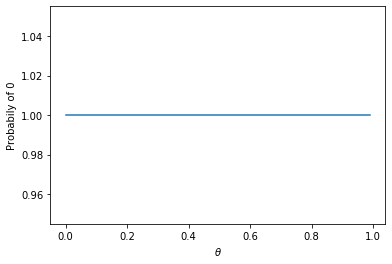

In [3]:
Ang = []
Prob_0 = []

for theta in range(100):
    theta /= 100
    
    psi = hadamard_test(R(theta), Zero)
    p_0, p_1 = measure1qbis(psi)
    
    Ang.append(theta)
    Prob_0.append(p_0)

plt.plot(Ang, Prob_0)
plt.xlabel('$\\theta$')
plt.ylabel('Probabily of 0')
plt.show()